# Prediction Maps

### Uploading files - unbalanced 2017-2019 test set / predictions vector / lon,lat, cubes in map format (lon,lat,time)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import pandas as pd
import os 

%matplotlib inline

In [2]:
file_unbal='/Users/katerinagiamalaki/Desktop/rf_mhw_local/unbal_20172019.csv'
unbal = pd.read_csv(file_unbal, header=None) #names=colnames,
unbal.columns = ['day', 'month','year','doy', 'lon', 'lat', 'Qnet','slp', 'sat', 'wind_speed','sst', 'sstRoC', 'mhw_categories']
unbal.head()

,day,month,year,doy,lon,lat,Qnet,slp,sat,wind_speed,sst,sstRoC,mhw_categories
0,1,1,2017,1,187.625,12.625,116.213735,-501.200000,13.586974,8.482409,0.416275,-0.003609,0
1,2,1,2017,2,187.625,12.625,59.984670,450.666667,13.585306,1.162682,0.412666,-0.009043,0
2,3,1,2017,3,187.625,12.625,56.567767,1793.033333,14.750630,-2.123997,0.403623,-0.099155,0
3,4,1,2017,4,187.625,12.625,45.995092,2937.733333,14.238646,2.392442,0.304468,-0.049913,0
4,5,1,2017,5,187.625,12.625,30.375309,3510.900000,15.210994,-2.422102,0.254555,-0.063659,0


In [3]:
file='/Users/katerinagiamalaki/Desktop/rf_mhw_local/y_pred_2017_2019_7lag.csv'
y_pred = pd.read_csv(file, header=None) #names=colnames,
y_pred.columns = [y_pred]
y_pred.head()

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


In [4]:
all_array = unbal
all_array.insert(13,"y_pred", y_pred)

In [5]:
all_array.head()

,day,month,year,doy,lon,lat,Qnet,slp,sat,wind_speed,sst,sstRoC,mhw_categories,y_pred
0,1,1,2017,1,187.625,12.625,116.213735,-501.200000,13.586974,8.482409,0.416275,-0.003609,0,0.0
1,2,1,2017,2,187.625,12.625,59.984670,450.666667,13.585306,1.162682,0.412666,-0.009043,0,0.0
2,3,1,2017,3,187.625,12.625,56.567767,1793.033333,14.750630,-2.123997,0.403623,-0.099155,0,1.0
3,4,1,2017,4,187.625,12.625,45.995092,2937.733333,14.238646,2.392442,0.304468,-0.049913,0,0.0
4,5,1,2017,5,187.625,12.625,30.375309,3510.900000,15.210994,-2.422102,0.254555,-0.063659,0,0.0


In [6]:
file='/Users/katerinagiamalaki/Desktop/rf_mhw_local/lon.csv'
lon = pd.read_csv(file, header=None) #names=colnames,
lon.columns = [lon]
lon.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,187.5,187.5,187.5,187.5,187.5,187.5,187.5,187.5,187.5,187.5,...,187.5,187.5,187.5,187.5,187.5,187.5,187.5,187.5,187.5,187.5
1,190.0,190.0,190.0,190.0,190.0,190.0,190.0,190.0,190.0,190.0,...,190.0,190.0,190.0,190.0,190.0,190.0,190.0,190.0,190.0,190.0
2,192.5,192.5,192.5,192.5,192.5,192.5,192.5,192.5,192.5,192.5,...,192.5,192.5,192.5,192.5,192.5,192.5,192.5,192.5,192.5,192.5
3,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,...,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0,195.0
4,197.5,197.5,197.5,197.5,197.5,197.5,197.5,197.5,197.5,197.5,...,197.5,197.5,197.5,197.5,197.5,197.5,197.5,197.5,197.5,197.5


In [7]:
file='/Users/katerinagiamalaki/Desktop/rf_mhw_local/lat.csv'
lat = pd.read_csv(file, header=None) #names=colnames,
lat.columns = [lat]
lat.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,12.5,15,17.5,20,22.5,25,27.5,30,32.5,35,...,40,42.5,45,47.5,50,52.5,55,57.5,60,62.5
1,12.5,15,17.5,20,22.5,25,27.5,30,32.5,35,...,40,42.5,45,47.5,50,52.5,55,57.5,60,62.5
2,12.5,15,17.5,20,22.5,25,27.5,30,32.5,35,...,40,42.5,45,47.5,50,52.5,55,57.5,60,62.5
3,12.5,15,17.5,20,22.5,25,27.5,30,32.5,35,...,40,42.5,45,47.5,50,52.5,55,57.5,60,62.5
4,12.5,15,17.5,20,22.5,25,27.5,30,32.5,35,...,40,42.5,45,47.5,50,52.5,55,57.5,60,62.5


In [8]:
nc_f = '/Users/katerinagiamalaki/Desktop/rf_mhw_local/pred_map.nc'
nc_fid = nc.Dataset(nc_f, 'r')
print(nc_fid)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lon(29), lat(21)
    variables(dimensions): float64 pred_map(lat,lon), float64 lon(lon), float64 lat(lat)
    groups: 


In [9]:
pred_map = nc_fid.variables['pred_map'][:]

/Users/katerinagiamalaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [10]:
pred_map.shape

(21, 29)

In [13]:
mfdataDIR = '/Users/katerinagiamalaki/Desktop/rf_mhw_local/cubes_NP.nc'
DS = xr.open_mfdataset(mfdataDIR)
DS

<xarray.Dataset>
Dimensions:  (time: 13879, lat: 21, lon: 29)
Coordinates:
  * lon      (lon) float64 187.5 190.0 192.5 195.0 ... 250.0 252.5 255.0 257.5
  * lat      (lat) float64 12.5 15.0 17.5 20.0 22.5 ... 52.5 55.0 57.5 60.0 62.5
Dimensions without coordinates: time
Data variables:
    cubes    (time, lat, lon) float64 dask.array<chunksize=(13879, 21, 29), meta=np.ndarray>

In [15]:
mfdataDIRa = '/Users/katerinagiamalaki/Desktop/rf_mhw_local/pred_map.nc'
pm_19_7lag = xr.open_mfdataset(mfdataDIRa)
pm_19_7lag

<xarray.Dataset>
Dimensions:   (lat: 21, lon: 29)
Coordinates:
  * lon       (lon) float64 187.5 190.0 192.5 195.0 ... 250.0 252.5 255.0 257.5
  * lat       (lat) float64 12.5 15.0 17.5 20.0 22.5 ... 55.0 57.5 60.0 62.5
Data variables:
    pred_map  (lat, lon) float64 dask.array<chunksize=(21, 29), meta=np.ndarray>

In [20]:
mfdataDIRa = '/Users/katerinagiamalaki/Desktop/rf_mhw_local/pred_map_131019_270.nc'
pm_19_270lag = xr.open_mfdataset(mfdataDIRa)
pm_19_270lag

<xarray.Dataset>
Dimensions:              (lat: 21, lon: 29)
Coordinates:
  * lon                  (lon) float64 187.5 190.0 192.5 ... 252.5 255.0 257.5
  * lat                  (lat) float64 12.5 15.0 17.5 20.0 ... 57.5 60.0 62.5
Data variables:
    pred_map_131019_270  (lat, lon) float64 dask.array<chunksize=(21, 29), meta=np.ndarray>

In [21]:
mfdataDIRa = '/Users/katerinagiamalaki/Desktop/rf_mhw_local/pred_map_131019_560.nc'
pm_19_560lag = xr.open_mfdataset(mfdataDIRa)
pm_19_560lag

<xarray.Dataset>
Dimensions:              (lat: 21, lon: 29)
Coordinates:
  * lon                  (lon) float64 187.5 190.0 192.5 ... 252.5 255.0 257.5
  * lat                  (lat) float64 12.5 15.0 17.5 20.0 ... 57.5 60.0 62.5
Data variables:
    pred_map_131019_560  (lat, lon) float64 dask.array<chunksize=(21, 29), meta=np.ndarray>

In [23]:
mfdataDIRb = '/Users/katerinagiamalaki/Desktop/rf_mhw_local/pred_map_131017.nc'
pm_17_7lag = xr.open_mfdataset(mfdataDIRb)
pm_17_7lag

<xarray.Dataset>
Dimensions:          (lat: 21, lon: 29)
Coordinates:
  * lon              (lon) float64 187.5 190.0 192.5 195.0 ... 252.5 255.0 257.5
  * lat              (lat) float64 12.5 15.0 17.5 20.0 ... 55.0 57.5 60.0 62.5
Data variables:
    pred_map_131017  (lat, lon) float64 dask.array<chunksize=(21, 29), meta=np.ndarray>

In [26]:
file='/Users/katerinagiamalaki/Desktop/rf_mhw_local/lags.csv'
lags = pd.read_csv(file, header=None) #names=colnames,
lags.columns = [lags]
lags.head()

,0,1,2
0,2,0.6597,0.6672
1,7,0.6441,0.7418
2,14,0.6343,0.6161
3,30,0.6328,0.5959
4,50,0.6364,0.5806


In [62]:
lon_min=min(lon)
lon_max=max(lon)
lat_min=min(lat)
lat_max=max(lat)
X,Y = np.meshgrid(lon,lat)

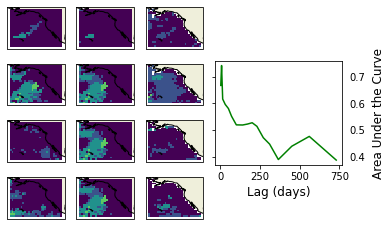

In [80]:
import cartopy
import cartopy.feature as cft
import cartopy.crs as ccrs
import cmocean as cm

cubes_7lag_1 = DS.cubes.isel(time=13063)
cubes_7lag_2 = DS.cubes.isel(time=13070)
cubes_7lag_3 = DS.cubes.isel(time=13793)
cubes_7lag_4 = DS.cubes.isel(time=13799)
cubes_270lag = DS.cubes.isel(time=13530)
cubes_560lag = DS.cubes.isel(time=13240)
lon = DS.lon
lat = DS.lat
lons = np.array(DS.lon)
lats =np.array(DS.lat)
lon_min=min(lon)
color='viridis'

ax1 = plt.subplot2grid((4, 5), (0, 0), colspan=1, projection=ccrs.PlateCarree()) 
plt.pcolormesh(X, Y, cubes_7lag_1, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax1.coastlines(color = 'black')
ax1.add_feature(cft.LAND)

ax2 = plt.subplot2grid((4, 5), (0, 1), colspan=1 , projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_2, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax2.coastlines(color = 'black')
ax2.add_feature(cft.LAND)

ax3 = plt.subplot2grid((4, 5), (0, 2), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, pm_17_7lag.pred_map_131017, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax3.coastlines(color = 'black')
ax3.add_feature(cft.LAND)

ax4 = plt.subplot2grid((4, 5), (1, 0), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_3, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax4.coastlines(color = 'black')
ax4.add_feature(cft.LAND)

ax5 = plt.subplot2grid((4, 5), (1, 1), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_4, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax5.coastlines(color = 'black')
ax5.add_feature(cft.LAND)

ax6 = plt.subplot2grid((4, 5), (1, 2), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, pm_19_7lag.pred_map, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax6.coastlines(color = 'black')
ax6.add_feature(cft.LAND)

ax7 = plt.subplot2grid((4, 5), (2, 0), colspan=1, projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_270lag, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax7.coastlines(color = 'black')
ax7.add_feature(cft.LAND)

ax8 = plt.subplot2grid((4, 5), (2, 1), colspan=1, projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_4,  transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax8.coastlines(color = 'black')
ax8.add_feature(cft.LAND)

ax9 = plt.subplot2grid((4, 5), (2, 2), colspan=1, projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, pm_19_270lag.pred_map_131019_270, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax9.coastlines(color = 'black')
ax9.add_feature(cft.LAND)

#13240
ax10 = plt.subplot2grid((4, 5), (3, 0), colspan=1, projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_560lag , transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax10.coastlines(color = 'black')
ax10.add_feature(cft.LAND)

ax11 = plt.subplot2grid((4, 5), (3, 1), colspan=1, projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_4, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
ax11.coastlines(color = 'black')
ax11.add_feature(cft.LAND)
plt.clim(0, 4)

ax12 = plt.subplot2grid((4, 5), (3, 2), colspan=1, projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, pm_19_560lag.pred_map_131019_560, transform=ccrs.PlateCarree(), cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax12.coastlines(color = 'black')
ax12.add_feature(cft.LAND)

ax = plt.subplot2grid((4, 5), (1, 3), rowspan=2, colspan=2)
ax.plot(lags[0],lags[2],'-g')
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.ylabel('Area Under the Curve', labelpad=-170, fontsize=12)
plt.xlabel('Lag (days)', fontsize=12)


plt.show()